In [1]:
%matplotlib  inline
import pandas as pd

bank_data = pd.read_csv('data/bank_data_feats.csv', index_col=0)

bank_data.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure


In [2]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [3]:
bank_data['default'].value_counts()

no     4445
yes      76
Name: default, dtype: int64

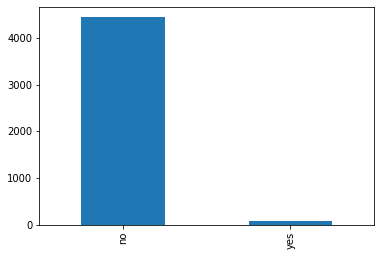

In [4]:
bank_data['default'].value_counts().plot(kind='bar')

In [5]:
bank_data['is_default'] = bank_data['default'].apply(lambda row: 1 if row == 'yes' else 0)

In [6]:
bank_data[['default', 'is_default']].tail()

,default,is_default
4516,no,0
4517,yes,1
4518,no,0
4519,no,0
4520,no,0


In [7]:
bank_data['is_housing'] = bank_data['housing'].apply(lambda row: 1 if row == 'yes' else 0)
bank_data['is_loan'] = bank_data['loan'].apply(lambda row: 1 if row == 'yes' else 0)

In [10]:
bank_data[['housing', 'is_housing']].tail()

,housing,is_housing
4516,yes,1
4517,yes,1
4518,no,0
4519,no,0
4520,yes,1


In [11]:
bank_data[['loan', 'is_loan']].tail()

,loan,is_loan
4516,no,0
4517,yes,1
4518,no,0
4519,no,0
4520,yes,1


In [12]:
# 범주형 데이터 처리

In [13]:
bank_data['marital'].value_counts()

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

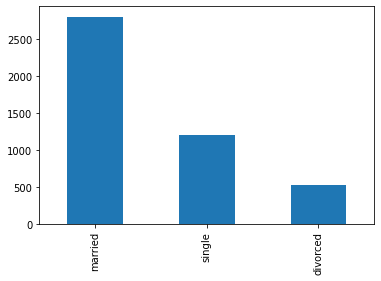

In [14]:
bank_data['marital'].value_counts().plot(kind='bar')

In [16]:
marital_dummies = pd.get_dummies(bank_data['marital'])
marital_dummies.tail()

,divorced,married,single
4516,0,1,0
4517,0,1,0
4518,0,1,0
4519,0,1,0
4520,0,0,1


In [17]:
marital_dummies.drop('divorced', axis=1, inplace=True)
marital_dummies.columns = [f'marital_{colname}' for colname in marital_dummies.columns]
marital_dummies.head()

,marital_married,marital_single
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [18]:
bank_data = pd.concat([bank_data, marital_dummies], axis=1)
bank_data.drop('marital', axis=1, inplace=True)

In [20]:
bank_data['education'].value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

In [21]:
bank_data['job'].value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [22]:
bank_data['contact'].value_counts()

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

In [23]:
bank_data['poutcome'].value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

In [24]:
bank_data['month'].value_counts()

may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64

In [25]:
month_map = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may': 5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
bank_data['month'] = bank_data['month'].map(month_map)

In [27]:
bank_data['month'].value_counts()

5     1398
7      706
8      633
6      531
11     389
4      293
2      222
1      148
10      80
9       52
3       49
12      20
Name: month, dtype: int64

In [28]:
bank_data.dtypes

age                 int64
job                object
education          object
default            object
balance             int64
housing            object
loan               object
contact            object
day                 int64
month               int64
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
is_default          int64
is_housing          int64
is_loan             int64
marital_married     uint8
marital_single      uint8
dtype: object